# Veri temini

In [38]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve,
    RocCurveDisplay
)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

In [39]:
from mypyext import ml
from mypyext import extensions
from mypyext import dataanalysis as da

In [40]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [41]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")  # 0=malignant, 1=benign (sklearn'de böyle)

df = X.copy()
df["target"] = y

df.shape
df["target"].value_counts()


(569, 31)

target
1    357
0    212
Name: count, dtype: int64

# EDA

In [42]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [43]:
df.describe().T.sample(5)

,count,mean,std,min,25%,50%,75%,max
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.1634
worst smoothness,569.0,0.132369,0.022832,0.07117,0.11660,0.13130,0.14600,0.2226
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.2800
concavity error,569.0,0.031894,0.030186,0.00000,0.01509,0.02589,0.04205,0.3960
worst compactness,569.0,0.254265,0.157336,0.02729,0.14720,0.21190,0.33910,1.0580


In [44]:
df["target"].value_counts(normalize=True).round(2)


target
1    0.63
0    0.37
Name: proportion, dtype: float64

In [45]:
#veri tipleri beklendiği gibi mi: para birimi v.s var mı diye de bakalım
df.super_info_()

,Type,Nunique(Excl.Nulls),#of Missing,MostFreqItem,MostFreqCount,First
mean radius,float64,456,0,12.340000,4,17.990000
mean texture,float64,479,0,15.700000,3,10.380000
mean perimeter,float64,522,0,82.610000,3,122.800000
mean area,float64,539,0,512.200000,3,1001.000000
mean smoothness,float64,474,0,0.100700,5,0.118400
mean compactness,float64,537,0,0.120600,3,0.277600
mean concavity,float64,537,0,0.000000,13,0.300100
mean concave points,float64,542,0,0.000000,13,0.147100
mean symmetry,float64,432,0,0.176900,4,0.241900
mean fractal dimension,float64,499,0,0.056670,3,0.078710


Decision Tree modelleri birçok konuda toleranslı olduklarıı için boxplot, histogram v.s çizidirmeye şuan için gerek duymuyoruz

# Modelleme

## Train/Test Ayrımı

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((426, 30), (143, 30))

# Preprocessing işlemleri

## Data cleaning

Yok

In [47]:
#duplicate check for rows
len(df)-len(df.duplicated(keep=False))

0

In [48]:
#duplicate check for columns
len(set(df.columns))-len(df.columns)

0

## imputation

superinfoda gördük, yok

## Outlier handling

outlier toleransı var, gerek dumuyoruz

## Discretization

gerek yok

## feature creation/extraction

gerek yok

## feature selection

otomatik oluyor. çok kolonumuz da olmadığı için baştan küçültmeye gerek yok

## Feature Encoding (OHE v.s)

Bu verisetinde gerekli değil.

## Feature Transformation

gerek yok

## Scaling

farklı skalalara toleranslı, gerek yok

## Oversampling/Undersampling (if imbalanced)

aşırı bir dengesizlik olmadığı için gerek yok

## Dimension reduction

aşırı miktarda boyut olmadığı için gerekli dğeil

# Modelleme

## İlk model (baseline)

### Eğitim ve tahminleme

In [49]:
rf_base = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    bootstrap=True,
    oob_score=True
)

rf_base.fit(X_train, y_train)

pred_tr = rf_base.predict(X_train)
pred_te = rf_base.predict(X_test)

print("Train Acc:", accuracy_score(y_train, pred_tr))
print("Test  Acc:", accuracy_score(y_test, pred_te))


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",400
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

Train Acc: 1.0
Test  Acc: 0.958041958041958


In [50]:
def clf_metrics(y_true, y_pred, y_proba=None):
    out = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
    }
    if y_proba is not None:
        out["roc_auc"] = roc_auc_score(y_true, y_proba)
    return pd.Series(out)

proba_te = rf_base.predict_proba(X_test)[:, 1]
display(clf_metrics(y_test, pred_te, proba_te))


accuracy     0.958042
precision    0.956522
recall       0.977778
f1           0.967033
roc_auc      0.994130
dtype: float64

In [51]:
cm = confusion_matrix(y_test, pred_te)
cm

array([[49,  4],
       [ 2, 88]])

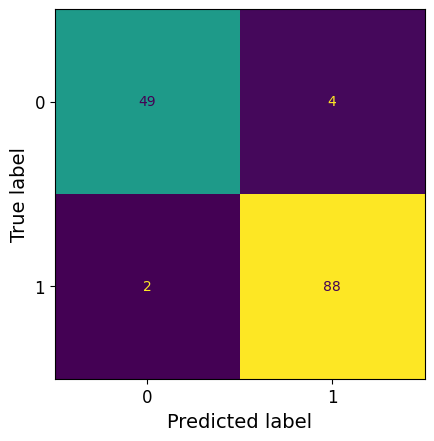

In [52]:
ConfusionMatrixDisplay.from_estimator(rf_base, X_test, y_test, colorbar=False)
plt.grid(False)

In [53]:
print(classification_report(y_test, pred_te, target_names=data.target_names))


              precision    recall  f1-score   support

   malignant       0.96      0.92      0.94        53
      benign       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



### cross validation

In [54]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"acc": "accuracy", "roc_auc": "roc_auc"}
cv_rf   = cross_validate(rf_base, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

def summarize_cv(name, res):
    print(f"\n{name}")
    print(f"  ACC    : {res['test_acc'].mean():.4f} ± {res['test_acc'].std():.4f}")
    print(f"  ROC-AUC: {res['test_roc_auc'].mean():.4f} ± {res['test_roc_auc'].std():.4f}")

summarize_cv("Random Forest (baseline)", cv_rf)


Random Forest (baseline)
  ACC    : 0.9578 ± 0.0175
  ROC-AUC: 0.9882 ± 0.0108



RF OOB Score (baseline): 0.9624

Confusion matrix (baseline RF):
[[49  4]
 [ 2 88]]

Classification report (baseline RF):
              precision    recall  f1-score   support

           0     0.9608    0.9245    0.9423        53
           1     0.9565    0.9778    0.9670        90

    accuracy                         0.9580       143
   macro avg     0.9587    0.9512    0.9547       143
weighted avg     0.9581    0.9580    0.9579       143

Test ROC-AUC (baseline RF): 0.9941299790356394


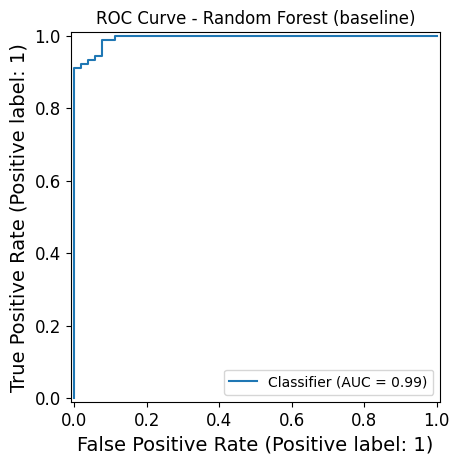

In [55]:
rf_base.fit(X_train, y_train)

print(f"\nRF OOB Score (baseline): {rf_base.oob_score_:.4f}")

y_proba = rf_base.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print("\nConfusion matrix (baseline RF):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report (baseline RF):")
print(classification_report(y_test, y_pred, digits=4))

print("Test ROC-AUC (baseline RF):", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba);
plt.title("ROC Curve - Random Forest (baseline)")
plt.show();

## Tuned Model

In [56]:
param_dist = {
    "n_estimators": [300, 500, 800],
    "max_depth": [None, 4, 6, 8, 12],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", 0.3, 0.5, 0.8],
    "bootstrap": [True],
    "class_weight": [None, "balanced"]
}

rf_for_search = RandomForestClassifier(
    random_state=42,
    # n_jobs=-1, # grid search'ta problem yaratıyor
    oob_score=True  # bootstrap=True seçildikçe çalışır
)

search = RandomizedSearchCV(
    estimator=rf_for_search,
    param_distributions=param_dist,
    n_iter=30,
    scoring="roc_auc",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=0,
    refit=True
)

search.fit(X_train, y_train)

print("\nBest CV ROC-AUC:", search.best_score_)
print("Best params:")
for k, v in search.best_params_.items():
    print(" ", k, "=", v)


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': [True], 'class_weight': [None, 'balanced'], 'max_depth': [None, 4, ...], 'max_features': ['sqrt', 'log2', ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",30
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here..


Best CV ROC-AUC: 0.9893059923130678
Best params:
  n_estimators = 800
  min_samples_split = 5
  min_samples_leaf = 2
  max_features = log2
  max_depth = 12
  class_weight = None
  bootstrap = True


In [57]:
best_rf = search.best_estimator_


In [58]:
# OOB score: bootstrap’la train edilince geride kalan OOB örneklerle kendini test ediyor
if hasattr(best_rf, "oob_score_"): #bootstrap=False denirse hata vermesin diye
    print(f"\nRF OOB Score (tuned): {best_rf.oob_score_:.4f}")


RF OOB Score (tuned): 0.9601



Confusion matrix (tuned RF):
[[49  4]
 [ 2 88]]

Classification report (tuned RF):
              precision    recall  f1-score   support

           0     0.9608    0.9245    0.9423        53
           1     0.9565    0.9778    0.9670        90

    accuracy                         0.9580       143
   macro avg     0.9587    0.9512    0.9547       143
weighted avg     0.9581    0.9580    0.9579       143

Test ROC-AUC (tuned RF): 0.9935010482180293


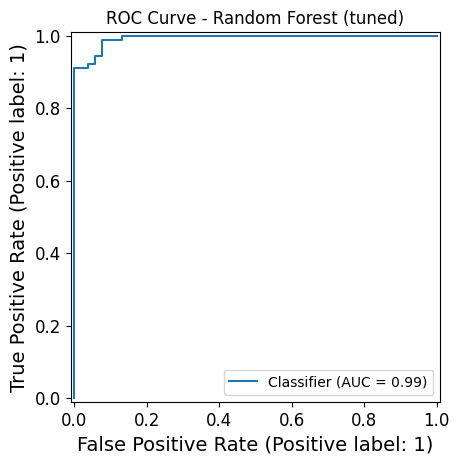

In [59]:
# test setle değrlendirme
best_proba = best_rf.predict_proba(X_test)[:, 1]
best_pred = (best_proba >= 0.5).astype(int)

print("\nConfusion matrix (tuned RF):")
print(confusion_matrix(y_test, best_pred))

print("\nClassification report (tuned RF):")
print(classification_report(y_test, best_pred, digits=4))

print("Test ROC-AUC (tuned RF):", roc_auc_score(y_test, best_proba))

RocCurveDisplay.from_predictions(y_test, best_proba);
plt.title("ROC Curve - Random Forest (tuned)")
plt.show();

### Feature Importance

In [60]:
# Düz Gini / impurity-based importance
# Bu, impurity-based olduğu için high-cardinality / correlated feature biası olabilir
gini_imp = pd.DataFrame({
    "feature": X.columns,
    "gini_importance": best_rf.feature_importances_
}).sort_values("gini_importance", ascending=False)

print("\nTop 15 Gini Importances:")
print(gini_imp.head(15).to_string(index=False))


Top 15 Gini Importances:
             feature  gini_importance
          worst area         0.125234
     worst perimeter         0.120176
worst concave points         0.119132
        worst radius         0.096783
 mean concave points         0.082343
         mean radius         0.059586
      mean perimeter         0.055927
           mean area         0.049175
      mean concavity         0.046859
          area error         0.037721
     worst concavity         0.035364
   worst compactness         0.019378
    mean compactness         0.017178
       worst texture         0.016500
     perimeter error         0.016296



Top 15 Permutation Importances (ROC-AUC decrease):
               feature  importance_mean  importance_std
  worst concave points         0.004039        0.002230
            worst area         0.001076        0.001642
   mean concave points         0.000922        0.000949
       worst perimeter         0.000531        0.001424
          worst radius         0.000391        0.001472
         worst texture         0.000280        0.000476
       worst concavity         0.000210        0.000810
          mean texture         0.000154        0.000371
        mean concavity         0.000140        0.000586
      worst smoothness        -0.000014        0.000456
mean fractal dimension        -0.000084        0.000103
       mean smoothness        -0.000098        0.000295
          radius error        -0.000112        0.000240
      smoothness error        -0.000126        0.000128
        symmetry error        -0.000126        0.000128


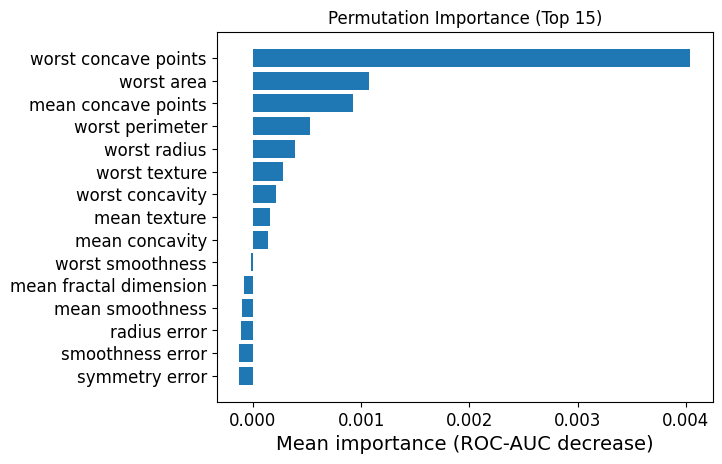

In [61]:
# daha dengeli bir önem ölçümü için permutation importance deneyelim
perm = permutation_importance(
    best_rf,
    X_test, y_test,
    n_repeats=15,
    random_state=42,
    n_jobs=-1,
    scoring="roc_auc"
)

perm_imp = pd.DataFrame({
    "feature": X.columns,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

print("\nTop 15 Permutation Importances (ROC-AUC decrease):")
print(perm_imp.head(15).to_string(index=False))

top_k = 15
plt.figure()
plt.barh(perm_imp.head(top_k)["feature"][::-1], perm_imp.head(top_k)["importance_mean"][::-1])
plt.title("Permutation Importance (Top 15)")
plt.xlabel("Mean importance (ROC-AUC decrease)")
plt.show();


# Ekler

Burada simülasyon yöntemi kulalnıldı, ödev/quiz olarak formülasyon istenecektir

## ensemble & binomial dağılım

In [62]:
np.random.rand(10, 3)
# np.random.rand(1_000_000, 25)

array([[0.86682335, 0.44699288, 0.93950771],
       [0.77509758, 0.67513393, 0.73326517],
       [0.95986295, 0.78782711, 0.77981936],
       [0.96749498, 0.82065026, 0.26726541],
       [0.14441346, 0.03837236, 0.2878802 ],
       [0.78195937, 0.54592845, 0.30404607],
       [0.13234819, 0.08100107, 0.41001111],
       [0.07054613, 0.34995546, 0.60486114],
       [0.24985673, 0.81164248, 0.4369005 ],
       [0.0464348 , 0.63292562, 0.04678306]])

In [63]:
# Parametreler
n_classifiers = 25
error_rate = 0.35
majority = 13
n_trials = 1_000_000  # simülasyon sayısı

# Her deneme: 25 sınıflandırıcının yanlış/doğru durumu
# 1 = yanlış, 0 = doğru
errors = np.random.rand(n_trials, n_classifiers) < error_rate


In [64]:
errors[:2]

array([[ True,  True, False, False, False, False, False,  True, False,
        False, False,  True, False,  True,  True, False, False,  True,
         True, False,  True,  True, False,  True, False],
       [ True, False, False, False,  True, False, False,  True,  True,
        False,  True, False, False,  True, False, False,  True, False,
        False, False, False, False, False,  True,  True]])

In [65]:
errors[:2].sum(axis=1)

array([11,  9])

In [66]:

# Her denemede kaç tanesi yanlış?
error_counts = errors.sum(axis=1)

# Çoğunluk yanlışsa ensemble yanlış
ensemble_errors = error_counts >= majority

simulated_error_prob = ensemble_errors.mean()

print(f"Simülasyonla bulunan hata olasılığı: {simulated_error_prob:.4f}")
print(f"Yüzde olarak: %{simulated_error_prob * 100:.2f}")


Simülasyonla bulunan hata olasılığı: 0.0598
Yüzde olarak: %5.98


### oob

In [67]:

def simulate_oob_fraction(n=1000, n_bootstraps=2000, seed=42):
    rng = np.random.default_rng(seed)
    oob_fracs = []

    for _ in range(n_bootstraps):
        # n gözlemden, n kez, replacement ile sample indexleri
        sample_idx = rng.integers(0, n, size=n)  # 0..n-1
        inbag = np.bincount(sample_idx, minlength=n) > 0
        oob = ~inbag #~ işlemi ile tersini alıyoruz, "not" demek
        oob_fracs.append(oob.mean())

    return float(np.mean(oob_fracs)), float(np.std(oob_fracs))

n = 1000
mean_oob, std_oob = simulate_oob_fraction(n=n, n_bootstraps=5000, seed=42)

theory = (1 - 1/n)**n  # teorik (yaklaşık) değer
print(f"n={n}")
print(f"Simülasyon OOB ortalama  : {mean_oob:.4f}  (std={std_oob:.4f})")
print(f"(1 - 1/n)^n teorik       : {theory:.4f}")
print(f"e^-1 yaklaşık            : {np.exp(-1):.4f}")


n=1000
Simülasyon OOB ortalama  : 0.3677  (std=0.0100)
(1 - 1/n)^n teorik       : 0.3677
e^-1 yaklaşık            : 0.3679


In [68]:
#aşamalı yakınsama
def simulate_oob_for_ns(ns=(10, 20, 50, 100, 200, 500, 1000, 5000), n_bootstraps=3000, seed=42):
    rows = []
    for n in ns:
        mean_oob, std_oob = simulate_oob_fraction(n=n, n_bootstraps=n_bootstraps, seed=seed)
        rows.append({
            "n": n,
            "sim_mean_oob": mean_oob,
            "sim_std_oob": std_oob,
            "(1-1/n)^n": (1 - 1/n)**n
        })
    return pd.DataFrame(rows)

df_res = simulate_oob_for_ns(n_bootstraps=3000, seed=42)
print(df_res.to_string(index=False, formatters={
    "sim_mean_oob": "{:.4f}".format,
    "sim_std_oob": "{:.4f}".format,
    "(1-1/n)^n": "{:.4f}".format
}))
print("\ne^-1 =", f"{np.exp(-1):.4f}")


   n sim_mean_oob sim_std_oob (1-1/n)^n
  10       0.3498      0.1014    0.3487
  20       0.3588      0.0705    0.3585
  50       0.3648      0.0445    0.3642
 100       0.3668      0.0318    0.3660
 200       0.3674      0.0214    0.3670
 500       0.3674      0.0140    0.3675
1000       0.3678      0.0101    0.3677
5000       0.3680      0.0045    0.3678

e^-1 = 0.3679
